https://datahack.analyticsvidhya.com/contest/black-friday/
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.



Variable	Definition
User_ID	User ID
Product_ID	Product ID
Gender	Sex of User
Age	Age in bins
Occupation	Occupation (Masked)
City_Category	Category of the City (A,B,C)
Stay_In_Current_City_Years	Number of years stay in current city
Marital_Status	Marital Status
Product_Category_1	Product Category (Masked)
Product_Category_2	Product may belongs to other category also (Masked)
Product_Category_3	Product may belongs to other category also (Masked)
Purchase	Purchase Amount (Target Variable)

road map

this is a prediction problem 
we have some intersting variables (age,gender,city,occupation,married or not) with product category
lets make some hypothesis
some visualization
data preprocessing

modeling: linear regression..... further

some hypothesis and results that have been found:

train and test dataset have common userid and product id
there are more of male of female
age more of 36-45 type  are found more
product_category has some high purchase 
I have done visualizations on variables
and aggregation on few varaibels 


##### load the packages and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_blavk.csv')

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.shape

(550068, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
len(set(train['Product_ID']))


3631

In [7]:
train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], dtype=object)

In [8]:
train['Age'] = train['Age'].map({'0-17':'A','18-25':'B','26-35':'C','36-45':'D','51-55':'E','55+':'F','46-50':'G'})

In [9]:
#train['Age'].fillna('G',inplace=True)

In [10]:
train['Age'].value_counts()

C    219587
D    110013
B     99660
G     45701
E     38501
F     21504
A     15102
Name: Age, dtype: int64

In [11]:
len(set(train['User_ID']))

5891

In [12]:
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [13]:
train['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [14]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [15]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace('4+','4')

In [16]:
train['Stay_In_Current_City_Years'].head()

0    2
1    2
2    2
3    2
4    4
Name: Stay_In_Current_City_Years, dtype: object

In [17]:
train['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [18]:

train['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [19]:
train['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

###### some statistical details

In [20]:

train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


###### visualization

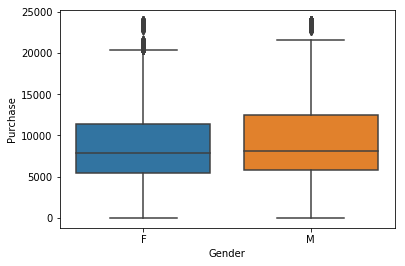

In [21]:
%matplotlib inline
sns.boxplot(x='Gender',y='Purchase',data=train)

In [22]:
y = train['Age'].value_counts()


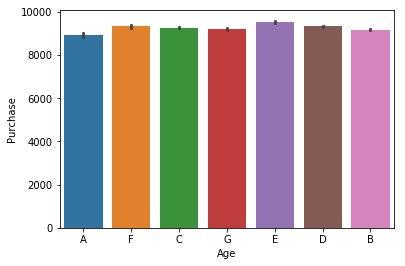

In [23]:
sns.barplot(x='Age',y='Purchase',data=train)

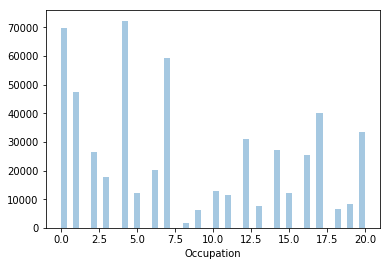

In [24]:
sns.distplot(train['Occupation'],kde=False)

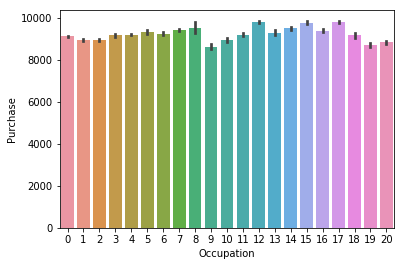

In [25]:
sns.barplot(x='Occupation',y='Purchase',data=train)

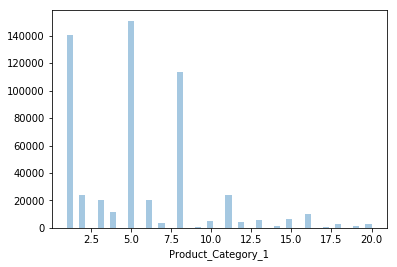

In [26]:
sns.distplot(train['Product_Category_1'],kde=False)


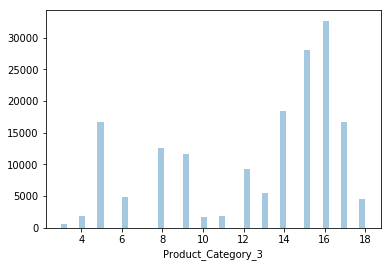

In [27]:
sns.distplot(train['Product_Category_3'].dropna(),kde=False)

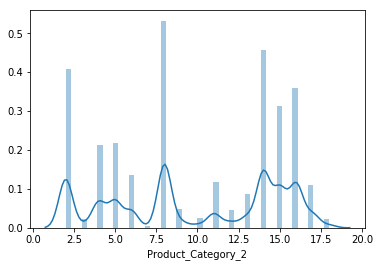

In [28]:
sns.distplot(train['Product_Category_2'].dropna(),norm_hist=True)

In [29]:
train['Product_Category_2'].fillna(8,inplace=True)

In [30]:
train['Product_Category_2'].value_counts(sort=True).head()

8.0     237726
14.0     55108
2.0      49217
16.0     43255
15.0     37855
Name: Product_Category_2, dtype: int64

In [31]:
train['Product_Category_3'].fillna(16,inplace=True)

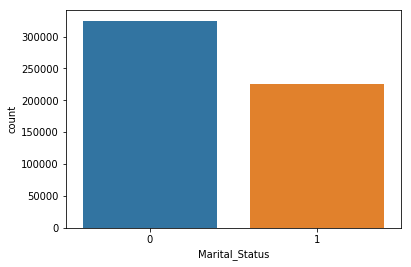

In [32]:
sns.countplot(train['Marital_Status'])

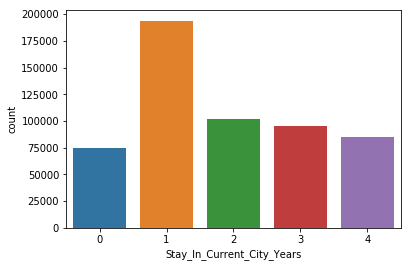

In [33]:
sns.countplot(train['Stay_In_Current_City_Years'])

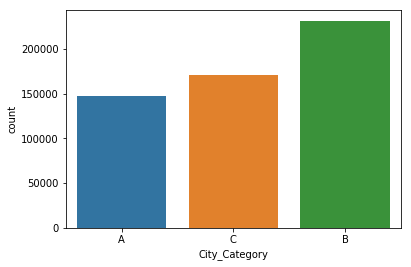

In [27]:
sns.countplot(train['City_Category'])

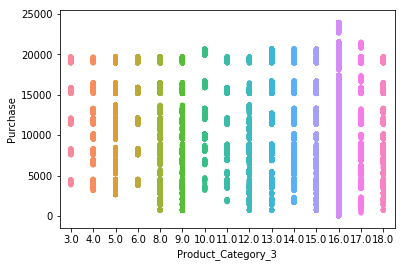

In [28]:
sns.stripplot('Product_Category_3','Purchase',data=train)

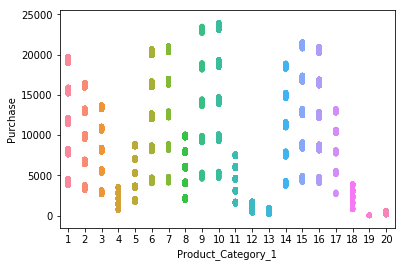

In [29]:
sns.stripplot('Product_Category_1','Purchase',data=train)

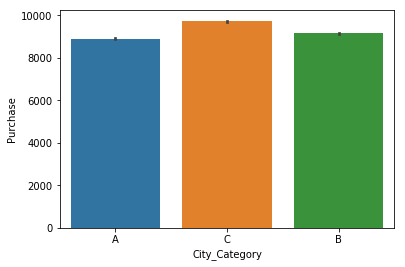

In [30]:
sns.barplot('City_Category','Purchase',data=train)

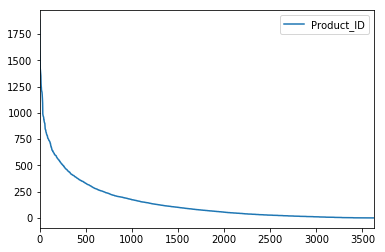

In [31]:
train.Product_ID.value_counts().reset_index().plot()

In [34]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [35]:
# lets see some aggregations

In [36]:
train[['City_Category','Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


In [37]:
train[['Stay_In_Current_City_Years','Purchase','City_Category']].groupby(['Stay_In_Current_City_Years','City_Category']).count()

Purchase
Stay_In_Current_City_Years City_Category          
0                          A                 24178
                           B                 28687
                           C                 21533
1                          A                 49305
                           B                 83413
                           C                 61103
2                          A                 27114
                           B                 41772
                           C                 32952
3                          A                 24804
                           B                 42691
                           C                 27790
4                          A                 22319
                           B                 34610
                           C                 27797

In [38]:
train[['Stay_In_Current_City_Years','Age']].groupby('Age').count()

,Stay_In_Current_City_Years
Age,
A,15102
B,99660
C,219587
D,110013
E,38501
F,21504
G,45701


In [39]:
train[['Product_Category_1','Purchase']].groupby('Product_Category_1').mean().sort('Purchase').head()

C:\Users\amogh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,Purchase
Product_Category_1,
19,37.041797
20,370.481176
13,722.400613
12,1350.859894
4,2329.659491


In [40]:
train[['Gender','Purchase']].groupby('Gender').count()

,Purchase
Gender,
F,135809
M,414259


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_x = {}
train_ = train.copy()
def f(train1):
    #train_ = train1.copy()
    
    
    for label in train1.columns:
        
        if train1[label].dtype == np.object:
            La = LabelEncoder()
            #La1 = La.fit(label)
            train_[label] = La.fit_transform(train1[label])
            label_x[label] = La.fit_transform(train1[label])
            
        else:
            print('o')
    
    return label_x
        
        
    

In [43]:
f(train)

o
o
o
o
o
o
o


{'Age': array([0, 0, 0, ..., 2, 5, 6], dtype=int64),
 'City_Category': array([0, 0, 0, ..., 1, 2, 1], dtype=int64),
 'Gender': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'Product_ID': array([ 672, 2376,  852, ..., 3568, 3568, 3566], dtype=int64),
 'Stay_In_Current_City_Years': array([2, 2, 2, ..., 4, 2, 4], dtype=int64)}

In [44]:
print(label_x)

{'Product_ID': array([ 672, 2376,  852, ..., 3568, 3568, 3566], dtype=int64), 'Gender': array([0, 0, 0, ..., 0, 0, 0], dtype=int64), 'Age': array([0, 0, 0, ..., 2, 5, 6], dtype=int64), 'City_Category': array([0, 0, 0, ..., 1, 2, 1], dtype=int64), 'Stay_In_Current_City_Years': array([2, 2, 2, ..., 4, 2, 4], dtype=int64)}


In [45]:
print(train_).head()

        User_ID  Product_ID  Gender  Age  Occupation  City_Category  \
0       1000001         672       0    0          10              0   
1       1000001        2376       0    0          10              0   
2       1000001         852       0    0          10              0   
3       1000001         828       0    0          10              0   
4       1000002        2734       1    5          16              2   
5       1000003        1831       1    2          15              0   
6       1000004        1745       1    6           7              1   
7       1000004        3320       1    6           7              1   
8       1000004        3604       1    6           7              1   
9       1000005        2631       1    2          20              0   
10      1000005        2398       1    2          20              0   
11      1000005         140       1    2          20              0   
12      1000005         307       1    2          20              0   
13    

AttributeError: 'NoneType' object has no attribute 'head'

In [46]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null int64
Gender                        550068 non-null int64
Age                           550068 non-null int64
Occupation                    550068 non-null int64
City_Category                 550068 non-null int64
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(10)
memory usage: 50.4 MB


In [47]:
test = pd.read_csv('test_black.csv')

In [48]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [49]:
def fun(train):
    train['Age'] = train['Age'].map({'0-17':'A','18-25':'B','26-35':'C','36-45':'D','51-55':'E','55+':'F','46-50':'G'})
    
    train['Product_Category_2'].fillna(8,inplace=True)
    train['Product_Category_3'].fillna(16,inplace=True)
    train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace('4+','4')
    
    return train.head()

In [50]:
fun(test)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,G,7,B,2,1,1,11.0,16.0
1,1000009,P00113442,M,C,17,C,0,0,3,5.0,16.0
2,1000010,P00288442,F,D,1,B,4,1,5,14.0,16.0
3,1000010,P00145342,F,D,1,B,4,1,4,9.0,16.0
4,1000011,P00053842,F,C,1,C,1,0,4,5.0,12.0


In [51]:
common = np.intersect1d(train['User_ID'],test['User_ID'])

In [52]:
len(common)

5891

In [53]:
print('common UserId :',common)

common UserId : [1000001 1000002 1000003 ..., 1006038 1006039 1006040]


In [54]:
def f(test):
    
    test_= test.copy()
    
    for label in test.columns:
        if test[label].dtype== np.object:
            la= LabelEncoder()
        
            test_[label]=la.fit_transform(test[label])
        
    return test_.head()
        

In [55]:
f(test)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,1144,1,6,7,1,2,1,1,11.0,16.0
1,1000009,994,1,2,17,2,0,0,3,5.0,16.0
2,1000010,2672,0,3,1,1,4,1,5,14.0,16.0
3,1000010,1299,0,3,1,1,4,1,4,9.0,16.0
4,1000011,519,0,2,1,2,1,0,4,5.0,12.0


In [56]:
#lets see modeling 

In [57]:
features = ['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

In [58]:
from sklearn.cross_validation import train_test_split

C:\Users\amogh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(train_[features],train_['Purchase'],test_size = 0.2)

In [60]:
train_test_split?

In [61]:
# recursive feature selection:


In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
reg = LinearRegression()

In [64]:
from sklearn.feature_selection import RFECV

In [65]:
from sklearn.metrics import mean_squared_error

In [119]:
def func(Y_test,Y_pred):
    return np.sqrt(mean_squared_error(Y_pred,Y_test))






In [67]:
from sklearn.cross_validation import KFold

In [68]:
rf = RFECV(estimator=reg,cv=KFold(n_folds=10,n=len(X_train)))

In [69]:
#RFECV.fit[X=train_[festures],y=train_['Purchase']]

In [70]:
# extra tree regressor

In [71]:
from sklearn.tree import ExtraTreeRegressor

In [72]:
forest = ExtraTreeRegressor()

In [73]:
forest.fit(X_train,Y_train)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
          max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

In [74]:
importance = forest.feature_importances_

In [75]:
indices = np.argsort(importance)[::-1]

In [123]:
indices

array([6, 2, 4, 1, 8, 7, 5, 3, 0], dtype=int64)

In [76]:
for p in range(X_train[features].shape[1]):
    print(' feature {}....{}'.format(features[indices[p]],importance[indices[p]]))

 feature Product_Category_1....0.7881674233571915
 feature Occupation....0.06745054628507542
 feature Stay_In_Current_City_Years....0.03631558719852952
 feature Age....0.02900162322181033
 feature Product_Category_3....0.028235722029882677
 feature Product_Category_2....0.026079834105611086
 feature Marital_Status....0.009301170287994716
 feature City_Category....0.008859531542892686
 feature Gender....0.0065885619710118895


In [ ]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)

In [78]:
#plt.bar(range(X_train[features].shape[1], importance[indices]))

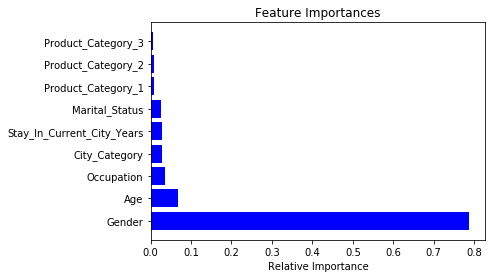

In [122]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

In [95]:
X = X_train.values

In [96]:
Y = Y_train.values

In [89]:
# Random forest 

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
forest = RandomForestRegressor(n_estimators=100,max_depth=24)

In [81]:
from sklearn.model_selection import cross_validate


from sklearn.model_selection import KFold

In [83]:
#cv = cross_validate(forest,X_train,Y_train,cv = KFold(len(X_train)))

In [97]:
forest.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=24,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [101]:
y_pred = forest.predict(X_test)

In [103]:
y_pred

array([ 13603.40937699,  15465.99446241,  10696.48083333, ...,
         6032.85884083,   1668.92150706,  14144.15811961])

In [115]:
from sklearn.metrics import mean_absolute_error

In [113]:
ac = r2_score(Y_test,y_pred)

In [117]:
ac = mean_absolute_error(Y_test,y_pred)

In [118]:
ac

2203.9075243967891